# CLF04 : Classification des biens de consommation

**Objectif** : Etudier la faisabilite d'un moteur de classification automatique des articles en differentes categories, a partir du texte (description du produit).

**Dataset** : Flipkart E-commerce 



## 1. Chargement des donnees

In [1]:
import pandas as pd  # manipulation de donnees tabulaires
import numpy as np  # calcul numerique
import os  # gestion des dossiers

# Creer les dossiers pour stocker les resultats
os.makedirs('outputs', exist_ok=True)
os.makedirs('models', exist_ok=True)

# Charger le fichier CSV
df = pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv')

# Afficher les dimensions
print(f'Nombre de lignes : {df.shape[0]}')
print(f'Nombre de colonnes : {df.shape[1]}')

Nombre de lignes : 1050
Nombre de colonnes : 15


In [2]:
# Afficher les premieres lignes
print("Premieres lignes du dataset :")
df.head(3)

Premieres lignes du dataset :


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."


In [3]:
# Afficher les dernieres lignes
print("Dernieres lignes du dataset :")
df.tail(3)

Dernieres lignes du dataset :


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZGFD3RCE,3465.0,1333.0,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,False,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1049,f2f027ad6a6df617c9f125173da71e44,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-large-vinyl-s...,Uberlyfe Large Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2ZEPACRQJKH7,1190.0,595.0,f2f027ad6a6df617c9f125173da71e44.jpg,False,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,4,4,Uberlyfe,"{""product_specification""=>[{""key""=>""Sales Pack..."


In [4]:
# Informations generales
print("Informations sur le dataset :")
df.info()

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 

In [5]:
# Colonnes du dataset
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

## 2. Analyse exploratoire des donnees (EDA)

### 2.1 Types de variables

In [6]:
# Types de donnees
df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [7]:
# Identifier les variables numeriques et qualitatives
var_num = df.select_dtypes(include=['float64', 'int64']).columns
var_categorielle = df.select_dtypes(include='object').columns

print(f"Variables numeriques ({len(var_num)}) : {var_num.tolist()}")
print(f"Variables qualitatives ({len(var_categorielle)}) : {var_categorielle.tolist()}")

Variables numeriques (2) : ['retail_price', 'discounted_price']
Variables qualitatives (12) : ['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'image', 'description', 'product_rating', 'overall_rating', 'brand', 'product_specifications']


In [8]:
# Statistiques descriptives des variables numeriques
df.describe(include='float')

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


### 2.2 Doublons

In [9]:
# Verification des doublons
nb_doublons = df.duplicated().sum()
print(f"Nombre de lignes dupliquees : {nb_doublons}")
print(f"Pourcentage de doublons : {(nb_doublons/len(df))*100:.2f}%")

# Doublons sur l'identifiant unique
nb_doublons_id = df['uniq_id'].duplicated().sum()
print(f"Doublons sur uniq_id : {nb_doublons_id}")

Nombre de lignes dupliquees : 0
Pourcentage de doublons : 0.00%
Doublons sur uniq_id : 0


### 2.3 Extraction de la variable cible

In [10]:
def extract_main_category(tree):
    """Extraire la categorie principale depuis l'arborescence."""
    if pd.isna(tree):
        return None
    tree = str(tree).strip('["\']')
    parts = tree.split(' >> ')
    return parts[0].strip('"').strip()

# Appliquer la fonction
df['main_category'] = df['product_category_tree'].apply(extract_main_category)

# Definir la variable cible
y = df['main_category']
print('Variable cible (y) definie.')
print(f'Nombre de categories : {y.nunique()}')
print()
print('Distribution :')
print(y.value_counts())

Variable cible (y) definie.
Nombre de categories : 7

Distribution :
main_category
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64


## 3. Separation des donnees en train / test

In [11]:
from sklearn.model_selection import train_test_split

# Definir X (toutes les colonnes sauf la cible)
X = df.drop(columns=['main_category'])

# Separation 80/20 stratifiee
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # garder la meme proportion de classes
)

print(f"X_train : {X_train.shape}")
print(f"X_test  : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test  : {y_test.shape}")
print()
print("Distribution dans le train :")
print(y_train.value_counts())
print()
print("Distribution dans le test :")
print(y_test.value_counts())

X_train : (840, 15)
X_test  : (210, 15)
y_train : (840,)
y_test  : (210,)

Distribution dans le train :
main_category
Home Furnishing               120
Computers                     120
Kitchen & Dining              120
Baby Care                     120
Home Decor & Festive Needs    120
Beauty and Personal Care      120
Watches                       120
Name: count, dtype: int64

Distribution dans le test :
main_category
Baby Care                     30
Beauty and Personal Care      30
Home Furnishing               30
Watches                       30
Home Decor & Festive Needs    30
Kitchen & Dining              30
Computers                     30
Name: count, dtype: int64


### 3.1 Detection des valeurs aberrantes (sur le train)

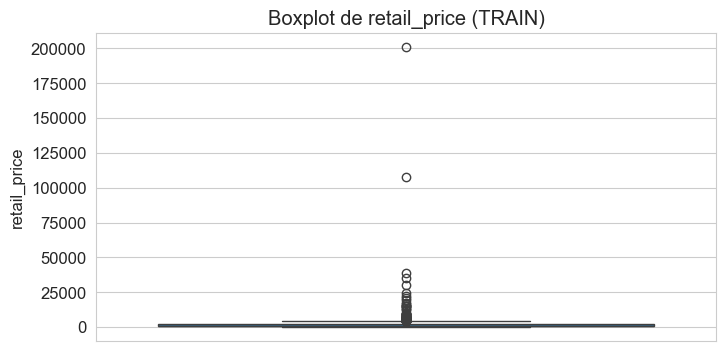

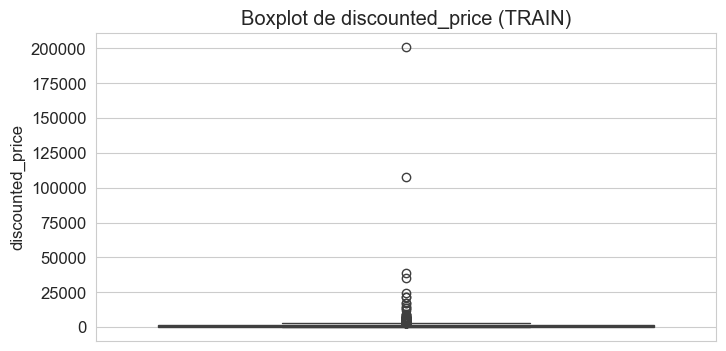

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Boxplots des variables numeriques du train
prix_cols = ['retail_price', 'discounted_price']

for col in prix_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=X_train[col])
    plt.title(f'Boxplot de {col} (TRAIN)')
    plt.show()

In [13]:
# Calcul des bornes IQR sur le TRAIN uniquement
bornes_iqr = {}

print("Calcul des bornes IQR sur le TRAIN SET :")

for var in prix_cols:
    Q1 = X_train[var].quantile(0.25)
    Q3 = X_train[var].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    bornes_iqr[var] = {'lower': lower_bound, 'upper': upper_bound}

    # Compter les outliers dans le train
    outliers_train = ((X_train[var] < lower_bound) | (X_train[var] > upper_bound)).sum()
    # Compter les outliers dans le test
    outliers_test = ((X_test[var] < lower_bound) | (X_test[var] > upper_bound)).sum()

    print(f"Variable : {var}")
    print(f"  Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
    print(f"  Bornes : [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers dans le train : {outliers_train}")
    print(f"  Outliers dans le test  : {outliers_test}")
    print()



Calcul des bornes IQR sur le TRAIN SET :
Variable : retail_price
  Q1=550.00, Q3=2066.00, IQR=1516.00
  Bornes : [-1724.00, 4340.00]
  Outliers dans le train : 77
  Outliers dans le test  : 14

Variable : discounted_price
  Q1=349.00, Q3=1291.25, IQR=942.25
  Bornes : [-1064.38, 2704.62]
  Outliers dans le train : 80
  Outliers dans le test  : 13



In [14]:
# Afficher les bornes calculees
bornes_iqr

{'retail_price': {'lower': -1724.0, 'upper': 4340.0},
 'discounted_price': {'lower': -1064.375, 'upper': 2704.625}}

### 3.2 Valeurs manquantes (traitement sur train, applique au test)

In [15]:
# Valeurs manquantes dans le TRAIN
print("Valeurs manquantes dans le TRAIN :")
train_missing = X_train.isnull().sum()
train_missing_pct = (train_missing / len(X_train) * 100).round(2)
train_missing_df = pd.DataFrame({
    'Manquantes': train_missing,
    'Pourcentage (%)': train_missing_pct
})
print(train_missing_df[train_missing_df['Manquantes'] > 0].sort_values('Manquantes', ascending=False))

print()
print("Valeurs manquantes dans le TEST :")
test_missing = X_test.isnull().sum()
test_missing_pct = (test_missing / len(X_test) * 100).round(2)
test_missing_df = pd.DataFrame({
    'Manquantes': test_missing,
    'Pourcentage (%)': test_missing_pct
})
print(test_missing_df[test_missing_df['Manquantes'] > 0].sort_values('Manquantes', ascending=False))

Valeurs manquantes dans le TRAIN :
                        Manquantes  Pourcentage (%)
brand                          276            32.86
product_specifications           1             0.12

Valeurs manquantes dans le TEST :
                  Manquantes  Pourcentage (%)
brand                     62            29.52
retail_price               1             0.48
discounted_price           1             0.48


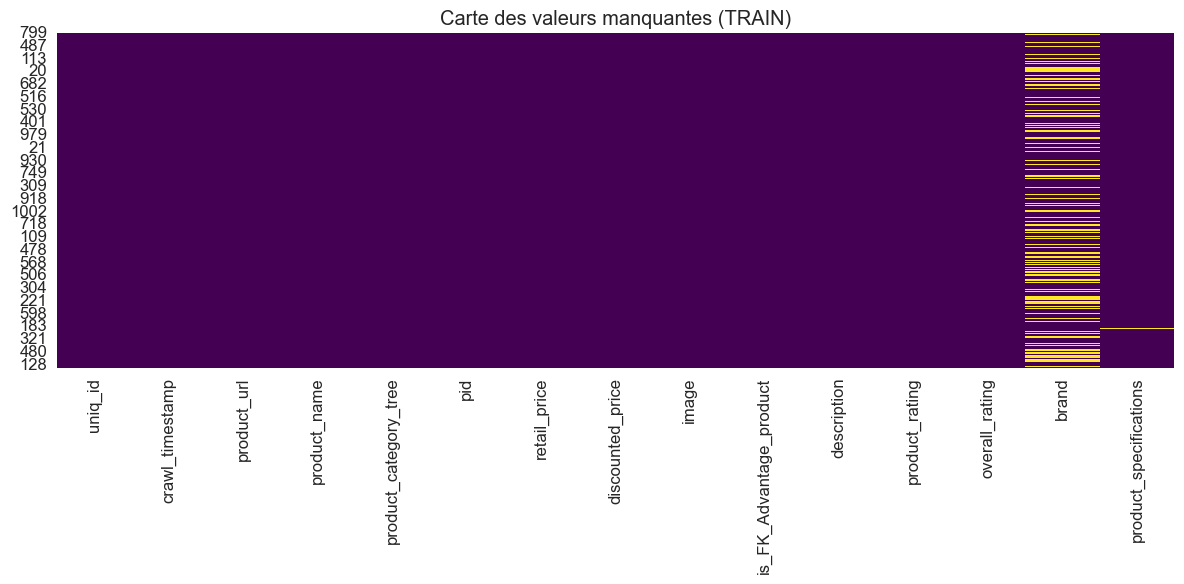

In [16]:
# Visualisation des valeurs manquantes dans le train
sns.heatmap(X_train.isnull(), cbar=False, cmap='viridis')
plt.title('Carte des valeurs manquantes (TRAIN)')
plt.tight_layout()
plt.savefig('outputs/01_valeurs_manquantes_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

In [17]:
# Imputation des variables numeriques : mediane calculee sur le TRAIN
print("Imputation des variables numeriques (mediane du TRAIN) :")

for var in prix_cols:
    if X_train[var].isnull().sum() > 0:
        # Calculer la mediane sur le train
        median_value = X_train[var].median()
        nb_missing_train = X_train[var].isnull().sum()
        nb_missing_test = X_test[var].isnull().sum()

        # Appliquer au train ET au test
        X_train[var].fillna(median_value, inplace=True)
        X_test[var].fillna(median_value, inplace=True)

        print(f"  - {var} : mediane={median_value:.2f}")
        print(f"    Train : {nb_missing_train} valeur(s) imputee(s)")
        print(f"    Test  : {nb_missing_test} valeur(s) imputee(s)")

# Imputation des variables qualitatives : mode calcule sur le TRAIN
print()
print("Imputation des variables qualitatives (mode du TRAIN) :")

quali_cols = ['brand', 'product_specifications']
for var in quali_cols:
    if X_train[var].isnull().sum() > 0:
        # Calculer le mode sur le train
        mode_value = X_train[var].mode()[0]
        nb_missing_train = X_train[var].isnull().sum()
        nb_missing_test = X_test[var].isnull().sum()

        # Appliquer au train ET au test
        X_train[var].fillna(mode_value, inplace=True)
        X_test[var].fillna(mode_value, inplace=True)

        print(f"  - {var} : mode='{mode_value}'")
        print(f"    Train : {nb_missing_train} valeur(s) imputee(s)")
        print(f"    Test  : {nb_missing_test} valeur(s) imputee(s)")

Imputation des variables numeriques (mediane du TRAIN) :

Imputation des variables qualitatives (mode du TRAIN) :
  - brand : mode='Lapguard'
    Train : 276 valeur(s) imputee(s)
    Test  : 62 valeur(s) imputee(s)
  - product_specifications : mode='{"product_specification"=>[{"key"=>"Type", "value"=>"Mug"}, {"key"=>"Mug Capacity", "value"=>"5.5 l"}, {"key"=>"Freezer Safe", "value"=>"Yes"}, {"key"=>"Material", "value"=>"Ceramic"}, {"key"=>"Microwave Safe", "value"=>"Yes"}, {"value"=>"1 Year Rockmantra Brand Warranty and Free Transit Insurance."}, {"key"=>"Diameter", "value"=>"88 mm"}, {"key"=>"Weight", "value"=>"300 g"}, {"key"=>"Height", "value"=>"101 mm"}, {"key"=>"Width", "value"=>"88 mm"}, {"key"=>"Sales Package", "value"=>"1 mug"}]}'
    Train : 1 valeur(s) imputee(s)
    Test  : 0 valeur(s) imputee(s)


/var/folders/dj/k9gt07zx01d_lh8h7rgb02dh0000gn/T/ipykernel_11909/274553551.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[var].fillna(mode_value, inplace=True)
/var/folders/dj/k9gt07zx01d_lh8h7rgb02dh0000gn/T/ipykernel_11909/274553551.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [18]:
# Verification : plus de valeurs manquantes
print(f"Valeurs manquantes restantes dans le TRAIN : {X_train.isnull().sum().sum()}")
print(f"Valeurs manquantes restantes dans le TEST  : {X_test.isnull().sum().sum()}")

Valeurs manquantes restantes dans le TRAIN : 0
Valeurs manquantes restantes dans le TEST  : 2


### 3.3 Analyse univariee (sur le train)

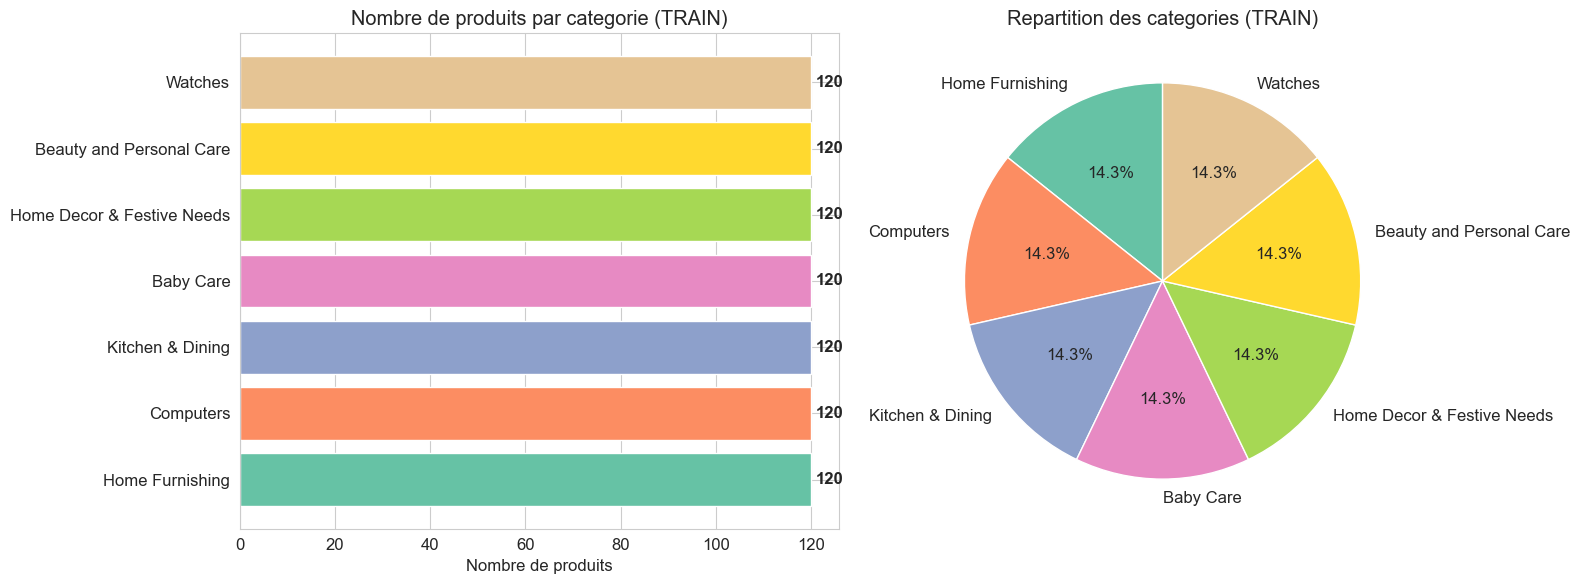

In [19]:
# Distribution de la variable cible dans le train
colors = sns.color_palette('Set2', y_train.nunique())
cat_counts = y_train.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(cat_counts.index, cat_counts.values, color=colors)
axes[0].set_xlabel('Nombre de produits')
axes[0].set_title('Nombre de produits par categorie (TRAIN)')
for i, v in enumerate(cat_counts.values):
    axes[0].text(v + 1, i, str(v), va='center', fontweight='bold')

axes[1].pie(cat_counts.values, labels=cat_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[1].set_title('Repartition des categories (TRAIN)')

plt.tight_layout()
plt.savefig('outputs/02_distribution_categories.png', dpi=150, bbox_inches='tight')
plt.show()

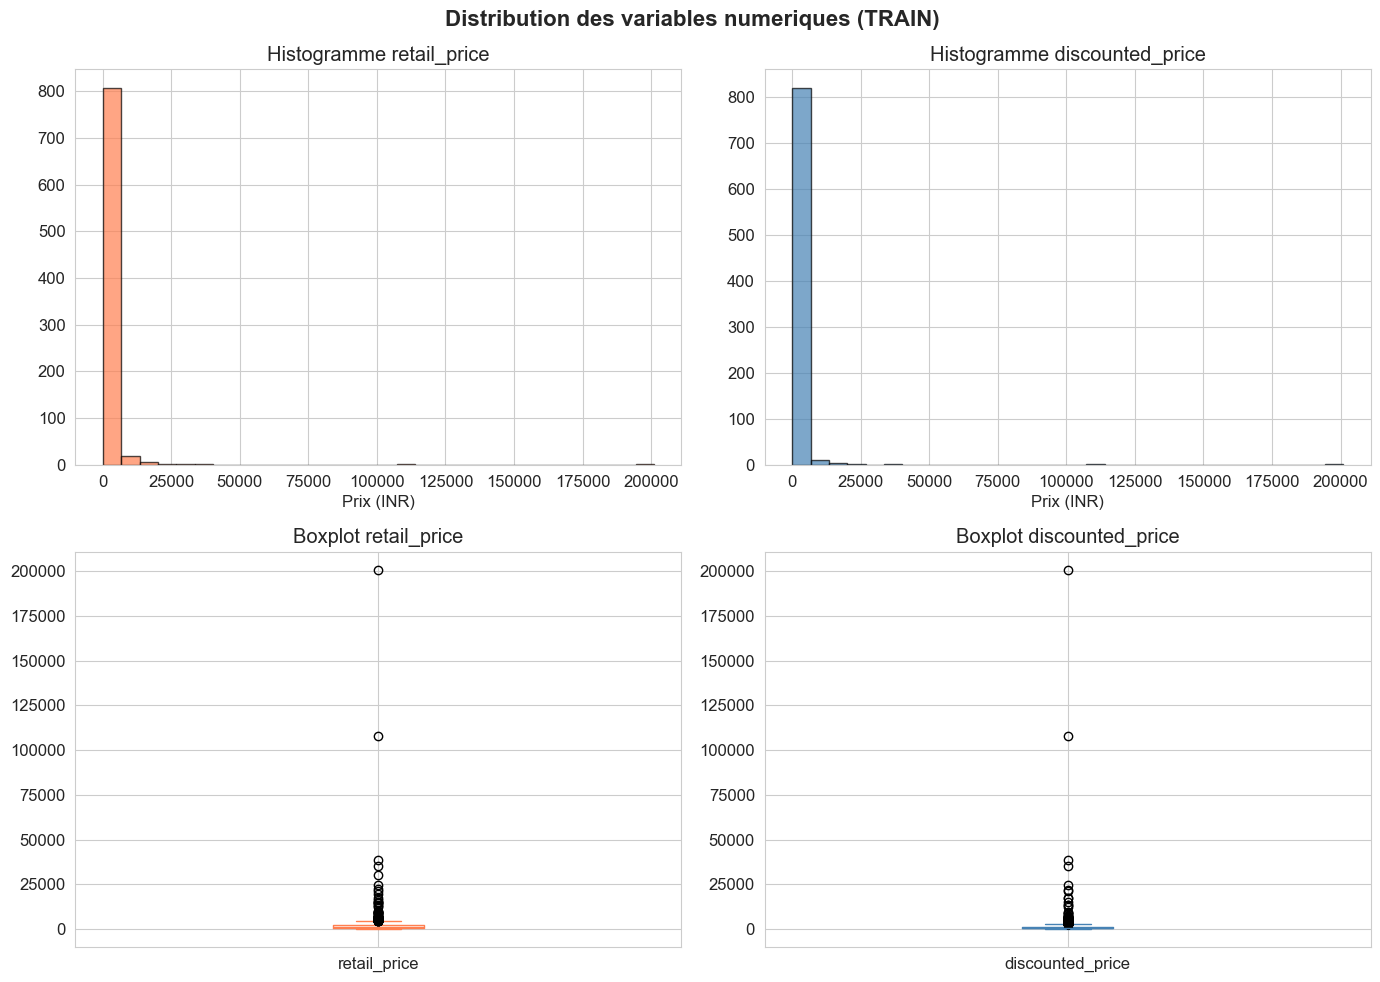

In [20]:
# Distribution des prix dans le train (histogrammes + boxplots)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution des variables numeriques (TRAIN)', fontsize=16, fontweight='bold')

X_train['retail_price'].dropna().hist(bins=30, ax=axes[0, 0], color='coral', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Histogramme retail_price')
axes[0, 0].set_xlabel('Prix (INR)')

X_train['discounted_price'].dropna().hist(bins=30, ax=axes[0, 1], color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Histogramme discounted_price')
axes[0, 1].set_xlabel('Prix (INR)')

X_train['retail_price'].dropna().plot(kind='box', ax=axes[1, 0], vert=True, color='coral')
axes[1, 0].set_title('Boxplot retail_price')

X_train['discounted_price'].dropna().plot(kind='box', ax=axes[1, 1], vert=True, color='steelblue')
axes[1, 1].set_title('Boxplot discounted_price')

plt.tight_layout()
plt.savefig('outputs/03_distribution_prix.png', dpi=150, bbox_inches='tight')
plt.show()

Top 15 marques les plus frequentes (TRAIN) :
brand
Lapguard          287
Lal Haveli          9
Raymond             8
Aroma Comfort       6
Tenda               6
Home Originals      6
HP                  6
PRINT SHAPES        6
Smartpro            5
Edimax              5
Asus                5
Rega IT             5
Wallmantra          5
Offspring           4
FS Mini Klub        4
Name: count, dtype: int64


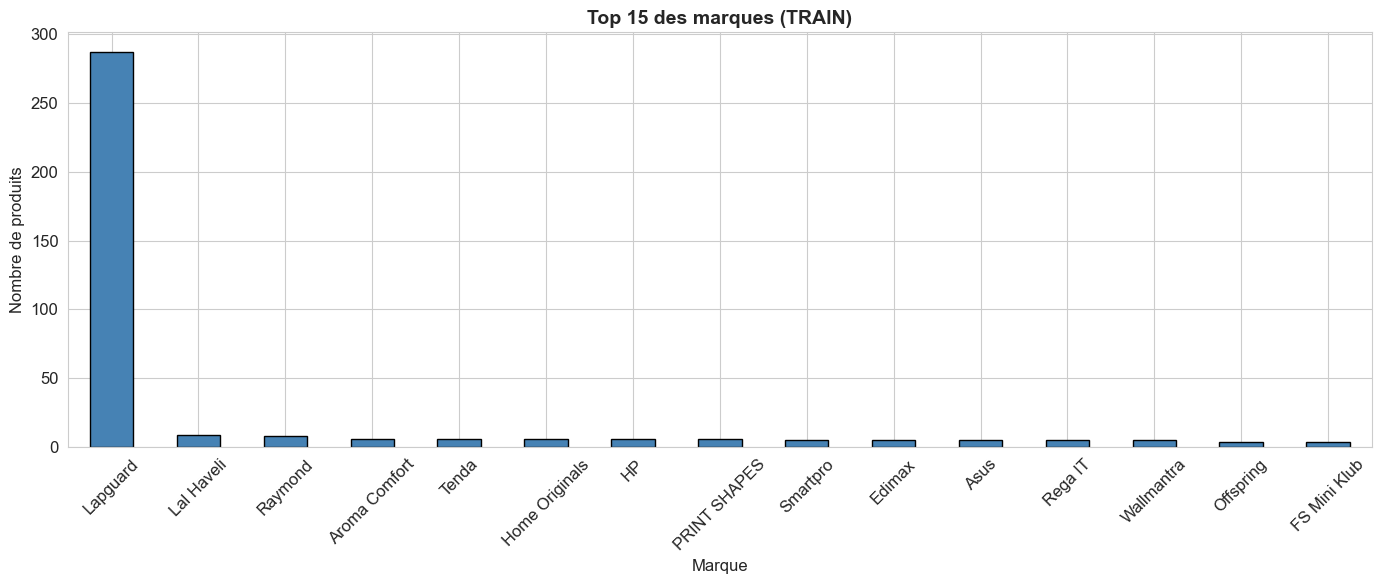

In [21]:
# Analyse des variables qualitatives du train
print("Top 15 marques les plus frequentes (TRAIN) :")
print(X_train['brand'].value_counts().head(15))

fig, ax = plt.subplots(figsize=(14, 6))
X_train['brand'].value_counts().head(15).plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_title('Top 15 des marques (TRAIN)', fontsize=14, fontweight='bold')
ax.set_xlabel('Marque')
ax.set_ylabel('Nombre de produits')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('outputs/04_top_marques.png', dpi=150, bbox_inches='tight')
plt.show()

### 3.4 Analyse bivariee et multivariee (sur le train)

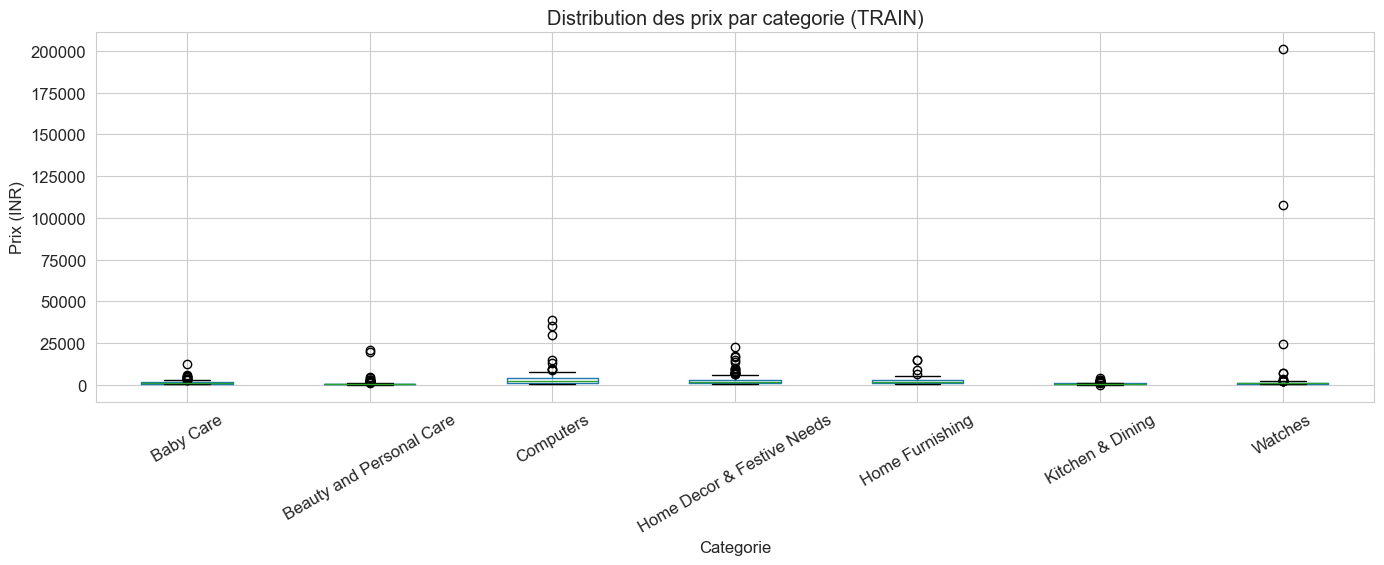

Prix moyen par categorie (TRAIN) :
main_category
Watches                       3947.72
Computers                     3730.09
Home Decor & Festive Needs    2934.30
Home Furnishing               2251.77
Baby Care                     1349.67
Beauty and Personal Care      1091.72
Kitchen & Dining               804.57
Name: retail_price, dtype: float64


In [22]:
# Prix par categorie (bivariee)
# On merge X_train avec y_train pour cette analyse
train_df = X_train.copy()
train_df['main_category'] = y_train.values

fig, ax = plt.subplots(figsize=(14, 6))
train_df.boxplot(column='retail_price', by='main_category', ax=ax, rot=30)
ax.set_title('Distribution des prix par categorie (TRAIN)')
ax.set_xlabel('Categorie')
ax.set_ylabel('Prix (INR)')
plt.suptitle('')
plt.tight_layout()
plt.savefig('outputs/05_prix_par_categorie.png', dpi=150, bbox_inches='tight')
plt.show()

print("Prix moyen par categorie (TRAIN) :")
print(train_df.groupby('main_category')['retail_price'].mean().sort_values(ascending=False).round(2))

Matrice de correlation (TRAIN) :
                  retail_price  discounted_price
retail_price             1.000             0.992
discounted_price         0.992             1.000


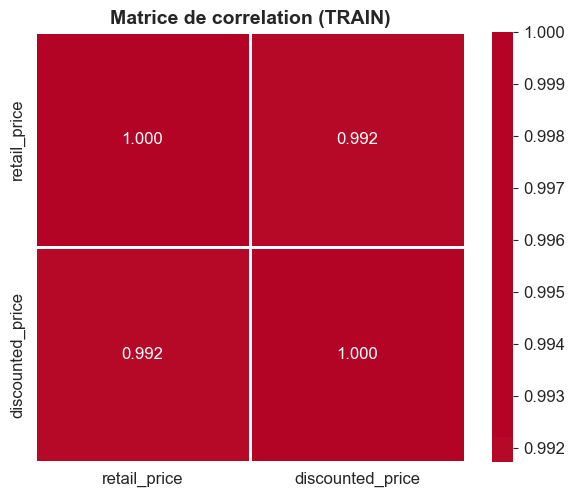

In [23]:
# Matrice de correlation (train)
num_cols = ['retail_price', 'discounted_price']
correlation_matrix = X_train[num_cols].corr()

print("Matrice de correlation (TRAIN) :")
print(correlation_matrix.round(3))

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.3f', ax=ax)
ax.set_title('Matrice de correlation (TRAIN)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/06_matrice_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

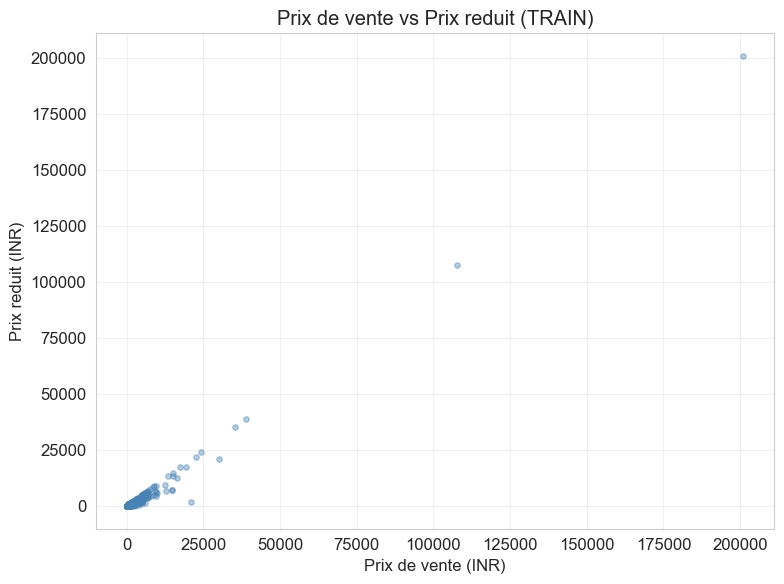

In [24]:
# Scatter plot prix vs prix reduit (train)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train['retail_price'], X_train['discounted_price'], alpha=0.4, color='steelblue', s=15)
ax.set_xlabel('Prix de vente (INR)')
ax.set_ylabel('Prix reduit (INR)')
ax.set_title('Prix de vente vs Prix reduit (TRAIN)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outputs/07_scatter_bivariee.png', dpi=150, bbox_inches='tight')
plt.show()

### 3.5 Nuages de mots par categorie (sur le train)

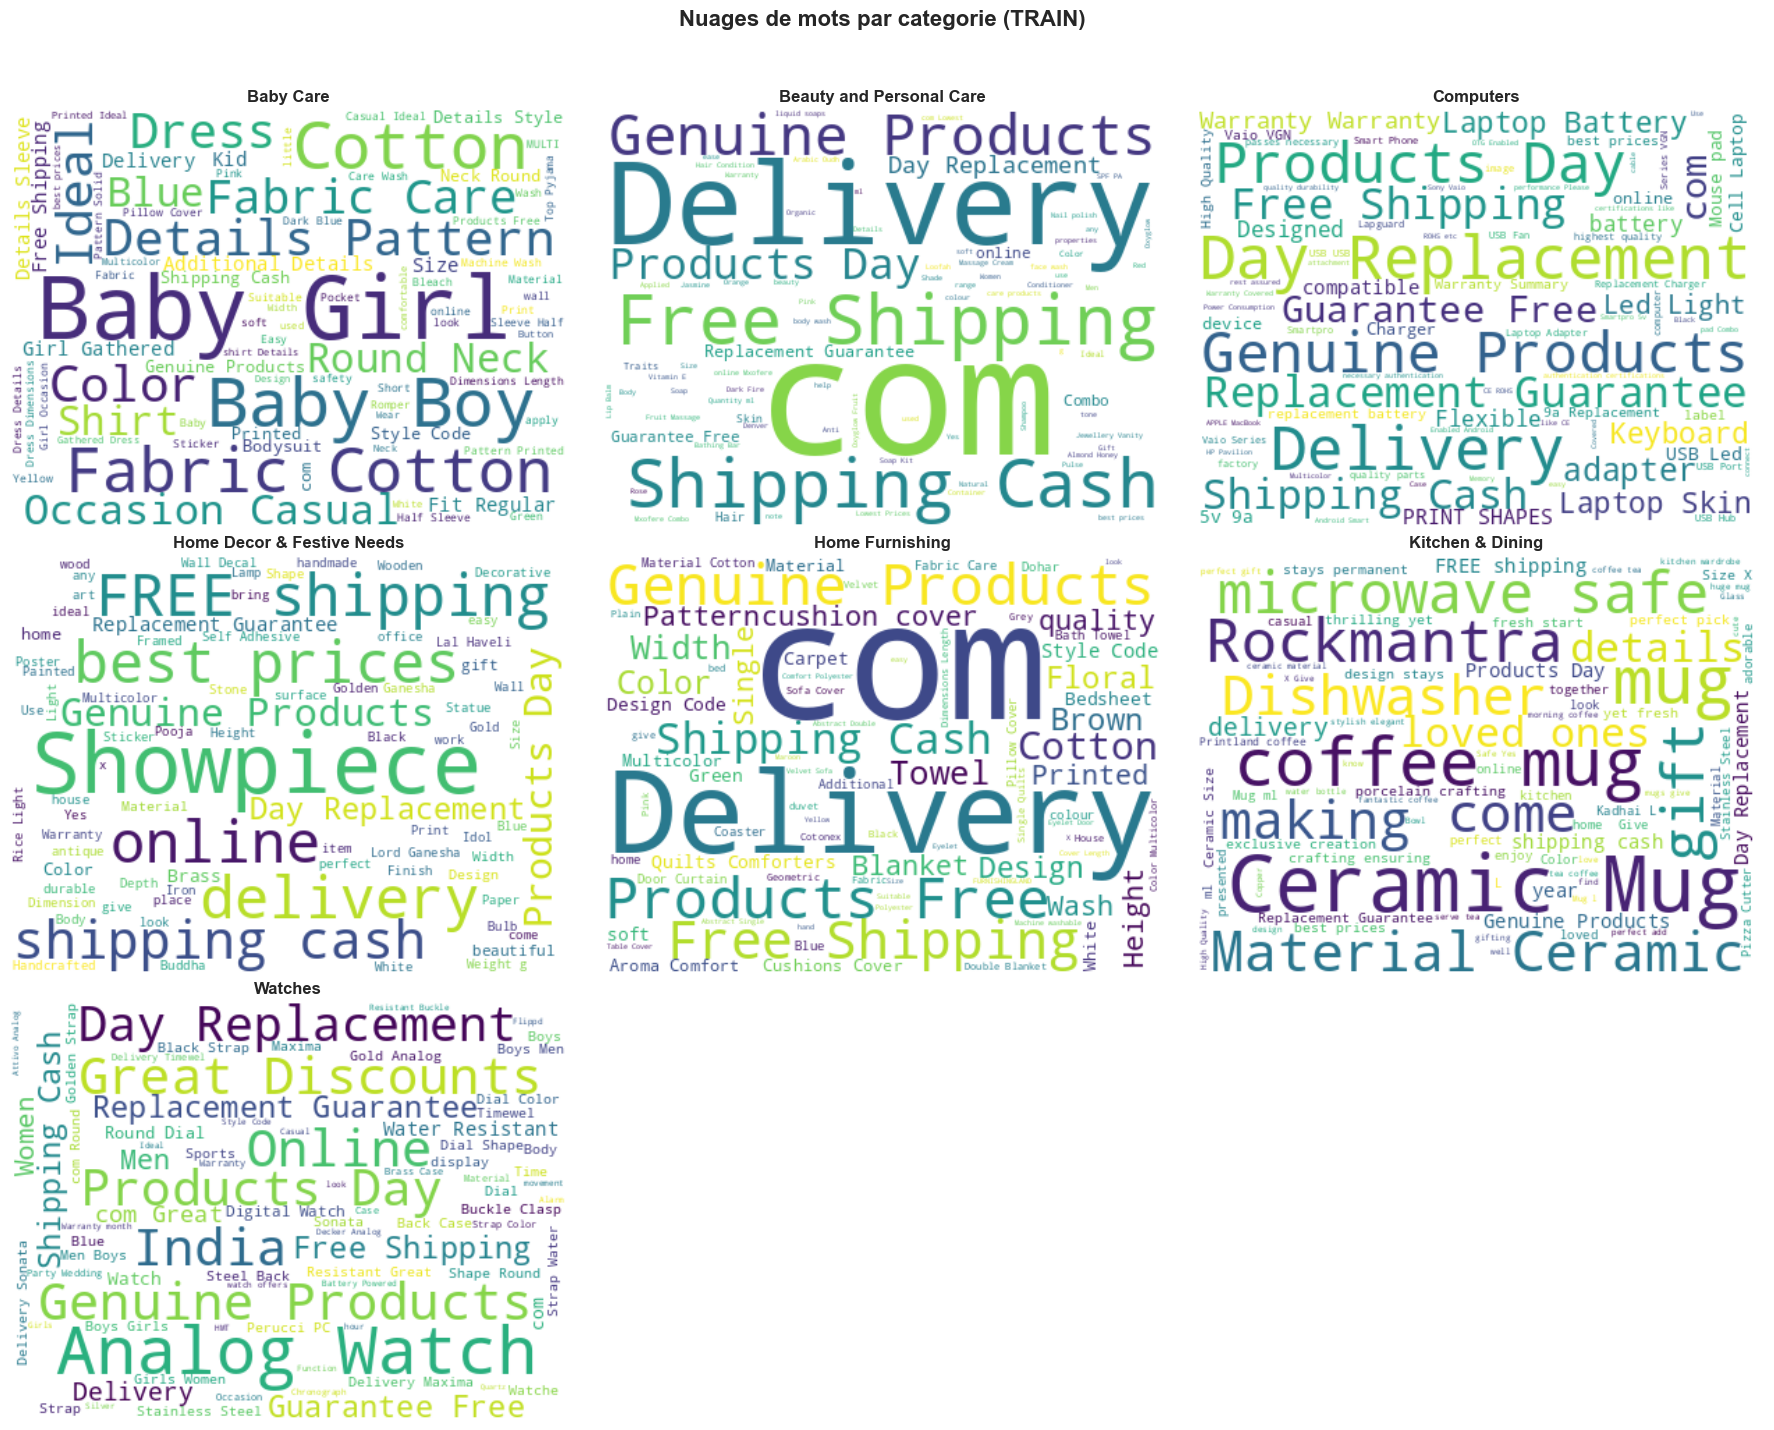

In [25]:
from wordcloud import WordCloud

# Stop words
ENGLISH_STOP_WORDS = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her',
    'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs',
    'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those',
    'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with',
    'about', 'against', 'between', 'through', 'during', 'before', 'after', 'above',
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
    'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
    'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's',
    't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're',
    've', 'y', 'also', 'could', 'would', 'shall', 'might', 'must', 'need', 'may',
    'get', 'got', 'one', 'two', 'three', 'four', 'five', 'make', 'made'
}
CUSTOM_STOP_WORDS = {
    'product', 'price', 'rs', 'buy', 'flipkart', 'specifications',
    'general', 'brand', 'model', 'key', 'features', 'sales', 'package',
    'number', 'contents', 'name', 'type', 'value', 'box', 'id',
    'available', 'rating', 'pack', 'set', 'cm', 'mm', 'inch'
}
STOP_WORDS = ENGLISH_STOP_WORDS.union(CUSTOM_STOP_WORDS)

# Nuages de mots sur le TRAIN uniquement
categories = sorted(y_train.unique())
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for i, cat in enumerate(categories):
    # Filtrer les descriptions du train pour cette categorie
    mask = y_train == cat
    descriptions = X_train.loc[mask, 'description'].astype(str)
    text = ' '.join(descriptions.values)

    wc = WordCloud(width=400, height=300, background_color='white',
                   stopwords=STOP_WORDS, max_words=80, colormap='viridis').generate(text)
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(cat, fontsize=12, fontweight='bold')
    axes[i].axis('off')

for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.suptitle('Nuages de mots par categorie (TRAIN)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('outputs/08_wordclouds.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Pretraitement du texte et Feature Engineering

### 4.1 Nettoyage du texte

In [26]:
import re
import string

# Combiner nom + description sur le TRAIN et le TEST
X_train['text'] = X_train['product_name'].astype(str) + ' ' + X_train['description'].astype(str)
X_test['text'] = X_test['product_name'].astype(str) + ' ' + X_test['description'].astype(str)

print('Exemple de texte brut (train) :')
print(X_train['text'].iloc[0][:300])
print('...')

Exemple de texte brut (train) :
Rajrang Animal Cushions Cover Buy Rajrang Animal Cushions Cover at Rs. 984 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!
...


In [27]:
def clean_text(text):
    """Nettoyer et preprocesser le texte."""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens = [w for w in tokens if w not in STOP_WORDS and len(w) > 2]
    return ' '.join(tokens)

# Appliquer le nettoyage au TRAIN et au TEST
print('Nettoyage du texte en cours...')
X_train['cleaned_text'] = X_train['text'].apply(clean_text)
X_test['cleaned_text'] = X_test['text'].apply(clean_text)
print('Nettoyage termine.')
print()

# Verifier
empty_train = X_train['cleaned_text'].apply(lambda x: len(x.strip()) == 0).sum()
empty_test = X_test['cleaned_text'].apply(lambda x: len(x.strip()) == 0).sum()
print(f'Textes vides dans le train : {empty_train}')
print(f'Textes vides dans le test  : {empty_test}')

Nettoyage du texte en cours...
Nettoyage termine.

Textes vides dans le train : 0
Textes vides dans le test  : 0


### 4.2 Vectorisation TF-IDF (fit sur le train, transform sur le test)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Encoder les categories cibles
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)  # fit sur le train
y_test_enc = le.transform(y_test)  # transform sur le test

print('Classes :')
for i, classe in enumerate(le.classes_):
    print(f'  {i} : {classe}')

Classes :
  0 : Baby Care
  1 : Beauty and Personal Care
  2 : Computers
  3 : Home Decor & Festive Needs
  4 : Home Furnishing
  5 : Kitchen & Dining
  6 : Watches


In [29]:
# Configurer et ajuster le TF-IDF sur le TRAIN uniquement
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95
)

# fit_transform sur le TRAIN
X_train_tfidf = tfidf.fit_transform(X_train['cleaned_text'])
# transform sur le TEST (pas de fit !)
X_test_tfidf = tfidf.transform(X_test['cleaned_text'])

print(f'Dimensions TF-IDF (train) : {X_train_tfidf.shape}')
print(f'Dimensions TF-IDF (test)  : {X_test_tfidf.shape}')

Dimensions TF-IDF (train) : (840, 4179)
Dimensions TF-IDF (test)  : (210, 4179)


### 4.3 Top termes TF-IDF par categorie

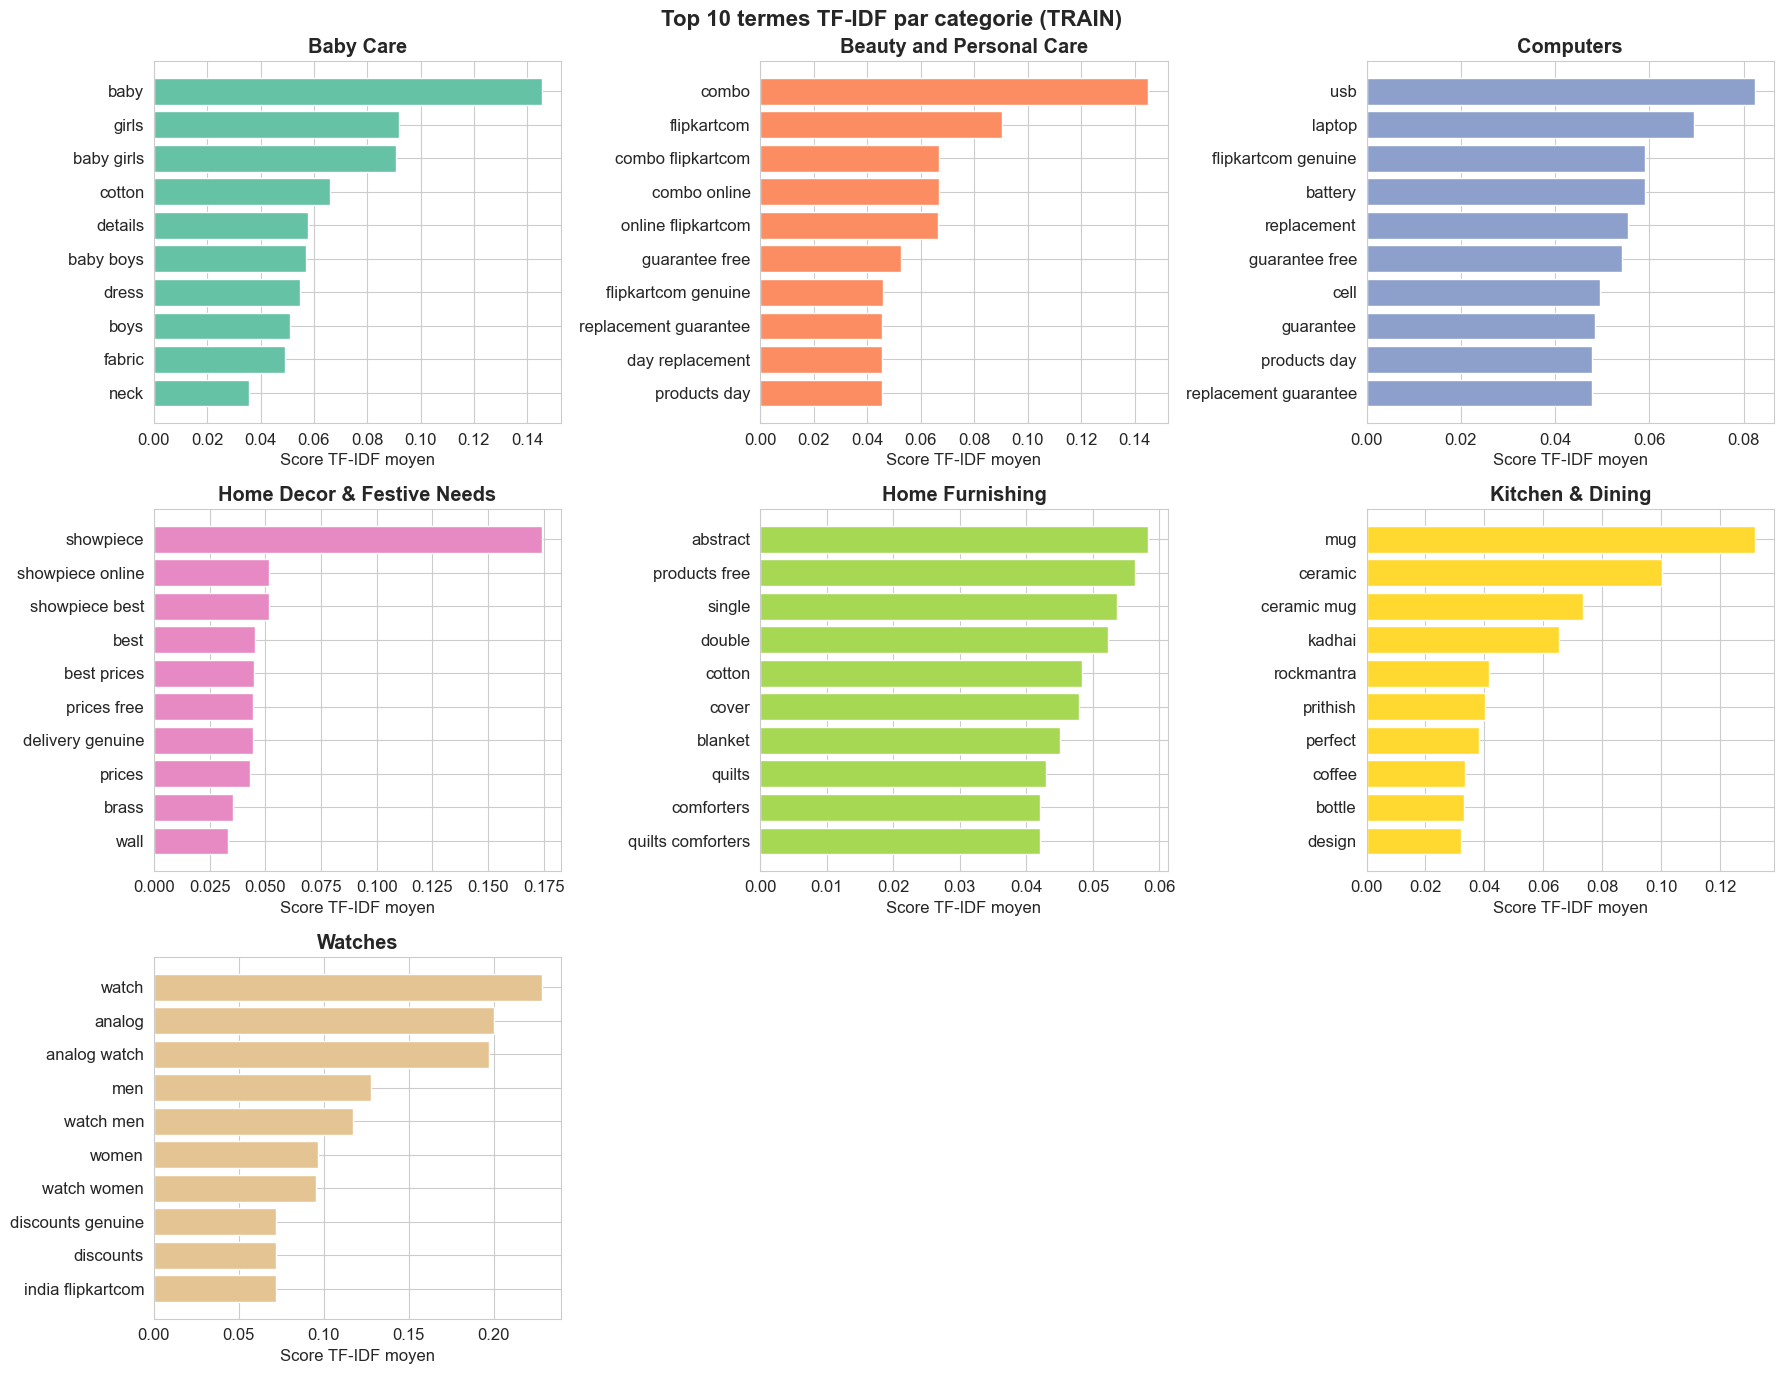

In [30]:
feature_names = tfidf.get_feature_names_out()

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for i in range(len(le.classes_)):
    cat_name = le.classes_[i]
    cat_mask = (y_train_enc == i)
    cat_tfidf = X_train_tfidf[cat_mask]
    mean_tfidf = cat_tfidf.mean(axis=0).A1
    top_idx = mean_tfidf.argsort()[-10:][::-1]
    top_terms = [feature_names[j] for j in top_idx]
    top_vals = [mean_tfidf[j] for j in top_idx]

    axes[i].barh(range(10), top_vals, color=colors[i % len(colors)])
    axes[i].set_yticks(range(10))
    axes[i].set_yticklabels(top_terms)
    axes[i].invert_yaxis()
    axes[i].set_title(cat_name, fontweight='bold')
    axes[i].set_xlabel('Score TF-IDF moyen')

for j in range(len(le.classes_), len(axes)):
    axes[j].axis('off')

plt.suptitle('Top 10 termes TF-IDF par categorie (TRAIN)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/09_top_tfidf_terms.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Modelisation et classification supervisee

### 5.1 Entrainement de plusieurs modeles

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 7 modeles a comparer
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Linear SVM': LinearSVC(max_iter=2000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    print(f'Entrainement de {name}...')
    cv_scores = cross_val_score(model, X_train_tfidf, y_train_enc, cv=5, scoring='accuracy')
    model.fit(X_train_tfidf, y_train_enc)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test_enc, y_pred)
    f1 = f1_score(y_test_enc, y_pred, average='weighted')
    prec = precision_score(y_test_enc, y_pred, average='weighted')
    rec = recall_score(y_test_enc, y_pred, average='weighted')

    results.append({
        'Modele': name, 'CV Accuracy (mean)': cv_scores.mean(),
        'CV Accuracy (std)': cv_scores.std(), 'Test Accuracy': acc,
        'F1 Score': f1, 'Precision': prec, 'Recall': rec
    })
    print(f'  CV: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f}) | Test: {acc:.4f} | F1: {f1:.4f}')

print()
print('Entrainement termine.')

Entrainement de Naive Bayes...
  CV: 0.9321 (+/- 0.0158) | Test: 0.9429 | F1: 0.9423
Entrainement de Logistic Regression...
  CV: 0.9464 (+/- 0.0100) | Test: 0.9381 | F1: 0.9387
Entrainement de Linear SVM...
  CV: 0.9536 (+/- 0.0069) | Test: 0.9476 | F1: 0.9479
Entrainement de Random Forest...
  CV: 0.9190 (+/- 0.0110) | Test: 0.9238 | F1: 0.9238
Entrainement de KNN...
  CV: 0.9048 (+/- 0.0146) | Test: 0.9238 | F1: 0.9235
Entrainement de Decision Tree...
  CV: 0.8714 (+/- 0.0358) | Test: 0.8667 | F1: 0.8658
Entrainement de Gradient Boosting...
  CV: 0.9286 (+/- 0.0106) | Test: 0.9143 | F1: 0.9160

Entrainement termine.


### 5.2 Comparaison des modeles

In [32]:
results_df = pd.DataFrame(results).sort_values('Test Accuracy', ascending=False).reset_index(drop=True)

display_df = results_df.copy()
for col in ['CV Accuracy (mean)', 'CV Accuracy (std)', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall']:
    display_df[col] = display_df[col].apply(lambda x: f'{x:.4f}')

print('Tableau comparatif des modeles :')
print()
print(display_df.to_string(index=False))

Tableau comparatif des modeles :

             Modele CV Accuracy (mean) CV Accuracy (std) Test Accuracy F1 Score Precision Recall
         Linear SVM             0.9536            0.0069        0.9476   0.9479    0.9484 0.9476
        Naive Bayes             0.9321            0.0158        0.9429   0.9423    0.9473 0.9429
Logistic Regression             0.9464            0.0100        0.9381   0.9387    0.9403 0.9381
      Random Forest             0.9190            0.0110        0.9238   0.9238    0.9303 0.9238
                KNN             0.9048            0.0146        0.9238   0.9235    0.9244 0.9238
  Gradient Boosting             0.9286            0.0106        0.9143   0.9160    0.9203 0.9143
      Decision Tree             0.8714            0.0358        0.8667   0.8658    0.8708 0.8667


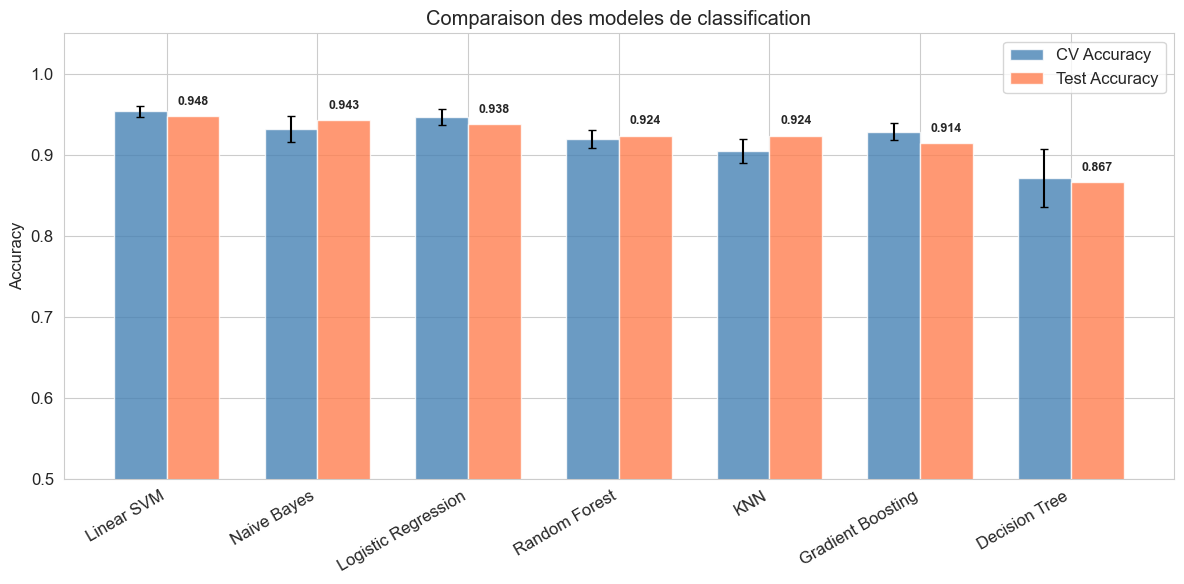

In [33]:
# Graphique comparatif
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.35

bars1 = ax.bar(x - width/2, results_df['CV Accuracy (mean)'], width,
               label='CV Accuracy', color='steelblue', alpha=0.8)
bars2 = ax.bar(x + width/2, results_df['Test Accuracy'], width,
               label='Test Accuracy', color='coral', alpha=0.8)
ax.errorbar(x - width/2, results_df['CV Accuracy (mean)'],
            yerr=results_df['CV Accuracy (std)'], fmt='none', color='black', capsize=3)

ax.set_ylabel('Accuracy')
ax.set_title('Comparaison des modeles de classification')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Modele'], rotation=30, ha='right')
ax.legend()
ax.set_ylim(0.5, 1.05)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/10_comparaison_modeles.png', dpi=150, bbox_inches='tight')
plt.show()

### 5.3 Analyse detaillee du meilleur modele

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

best_model_name = results_df.iloc[0]['Modele']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_tfidf)

print(f'Meilleur modele : {best_model_name}')
print(f'Test Accuracy : {results_df.iloc[0]["Test Accuracy"]:.4f}')
print(f'F1 Score : {results_df.iloc[0]["F1 Score"]:.4f}')
print()
print('Rapport de classification :')
print('=' * 80)
print(classification_report(y_test_enc, y_pred_best, target_names=le.classes_))

Meilleur modele : Linear SVM
Test Accuracy : 0.9476
F1 Score : 0.9479

Rapport de classification :
                            precision    recall  f1-score   support

                 Baby Care       0.84      0.87      0.85        30
  Beauty and Personal Care       0.93      0.93      0.93        30
                 Computers       1.00      1.00      1.00        30
Home Decor & Festive Needs       0.93      0.93      0.93        30
           Home Furnishing       0.93      0.93      0.93        30
          Kitchen & Dining       1.00      0.97      0.98        30
                   Watches       1.00      1.00      1.00        30

                  accuracy                           0.95       210
                 macro avg       0.95      0.95      0.95       210
              weighted avg       0.95      0.95      0.95       210



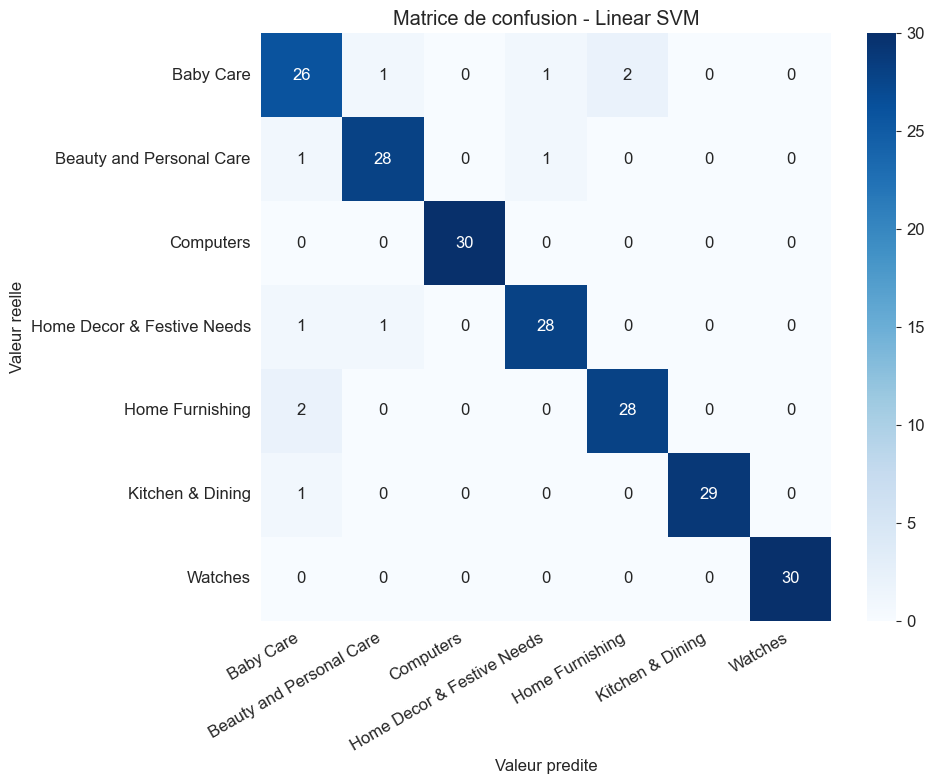

In [35]:
# Matrice de confusion
cm = confusion_matrix(y_test_enc, y_pred_best)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=ax)
ax.set_ylabel('Valeur reelle')
ax.set_xlabel('Valeur predite')
ax.set_title(f'Matrice de confusion - {best_model_name}')
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('outputs/11_matrice_confusion.png', dpi=150, bbox_inches='tight')
plt.show()

### 5.4 Optimisation des hyperparametres (GridSearchCV)

In [36]:
from sklearn.model_selection import GridSearchCV

# GridSearch sur LinearSVC
print('GridSearch sur LinearSVC...')
param_grid_svm = {
    'C': [0.1, 0.5, 1.0, 5.0, 10.0],
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [2000]
}
grid_svm = GridSearchCV(LinearSVC(random_state=42), param_grid_svm,
                        cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_tfidf, y_train_enc)

print(f'Meilleurs parametres : {grid_svm.best_params_}')
print(f'Meilleur score CV : {grid_svm.best_score_:.4f}')

y_pred_svm_opt = grid_svm.predict(X_test_tfidf)
acc_svm_opt = accuracy_score(y_test_enc, y_pred_svm_opt)
f1_svm_opt = f1_score(y_test_enc, y_pred_svm_opt, average='weighted')
print(f'Test Accuracy : {acc_svm_opt:.4f}')
print(f'F1 Score : {f1_svm_opt:.4f}')

GridSearch sur LinearSVC...


/opt/anaconda3/envs/tf-env/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/tf-env/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/tf-env/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Meilleurs parametres : {'C': 1.0, 'loss': 'squared_hinge', 'max_iter': 2000}
Meilleur score CV : 0.9536
Test Accuracy : 0.9476
F1 Score : 0.9479


/opt/anaconda3/envs/tf-env/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [37]:
# GridSearch sur Logistic Regression
print('GridSearch sur Logistic Regression...')
param_grid_lr = {
    'C': [0.1, 0.5, 1.0, 5.0, 10.0],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [1000]
}
grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr,
                       cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train_tfidf, y_train_enc)

print(f'Meilleurs parametres : {grid_lr.best_params_}')
print(f'Meilleur score CV : {grid_lr.best_score_:.4f}')

y_pred_lr_opt = grid_lr.predict(X_test_tfidf)
acc_lr_opt = accuracy_score(y_test_enc, y_pred_lr_opt)
f1_lr_opt = f1_score(y_test_enc, y_pred_lr_opt, average='weighted')
print(f'Test Accuracy : {acc_lr_opt:.4f}')
print(f'F1 Score : {f1_lr_opt:.4f}')

GridSearch sur Logistic Regression...
Meilleurs parametres : {'C': 5.0, 'max_iter': 1000, 'solver': 'lbfgs'}
Meilleur score CV : 0.9512
Test Accuracy : 0.9429
F1 Score : 0.9436


Modele final retenu : LinearSVC (optimise)
Test Accuracy : 0.9476
F1 Score : 0.9479

Rapport de classification (modele final) :
                            precision    recall  f1-score   support

                 Baby Care       0.84      0.87      0.85        30
  Beauty and Personal Care       0.93      0.93      0.93        30
                 Computers       1.00      1.00      1.00        30
Home Decor & Festive Needs       0.93      0.93      0.93        30
           Home Furnishing       0.93      0.93      0.93        30
          Kitchen & Dining       1.00      0.97      0.98        30
                   Watches       1.00      1.00      1.00        30

                  accuracy                           0.95       210
                 macro avg       0.95      0.95      0.95       210
              weighted avg       0.95      0.95      0.95       210



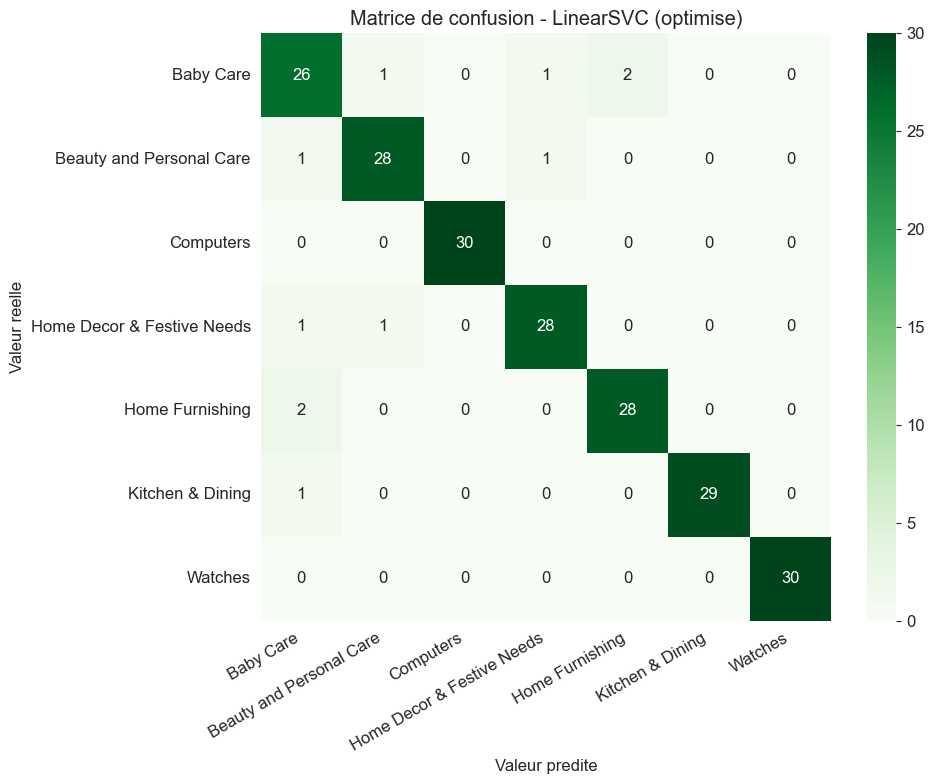

In [38]:
# Selectionner le meilleur modele optimise
if acc_svm_opt >= acc_lr_opt:
    final_model = grid_svm.best_estimator_
    final_name = 'LinearSVC (optimise)'
    y_pred_final = y_pred_svm_opt
    final_acc = acc_svm_opt
    final_f1 = f1_svm_opt
else:
    final_model = grid_lr.best_estimator_
    final_name = 'Logistic Regression (optimise)'
    y_pred_final = y_pred_lr_opt
    final_acc = acc_lr_opt
    final_f1 = f1_lr_opt

print(f'Modele final retenu : {final_name}')
print(f'Test Accuracy : {final_acc:.4f}')
print(f'F1 Score : {final_f1:.4f}')
print()
print('Rapport de classification (modele final) :')
print('=' * 80)
print(classification_report(y_test_enc, y_pred_final, target_names=le.classes_))

# Matrice de confusion finale
cm_final = confusion_matrix(y_test_enc, y_pred_final)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=ax)
ax.set_ylabel('Valeur reelle')
ax.set_xlabel('Valeur predite')
ax.set_title(f'Matrice de confusion - {final_name}')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('outputs/12_matrice_confusion_final.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Etude de faisabilite

In [39]:
print('ETUDE DE FAISABILITE - Classification automatique des biens de consommation')
print()
print('1. DONNEES')
print(f'   Dataset : Flipkart E-commerce, 1050 produits')
print(f'   Nombre de categories : 7')
print(f'   Distribution : equilibree (150 produits par categorie)')
print(f'   Train : {X_train_tfidf.shape[0]} echantillons / Test : {X_test_tfidf.shape[0]} echantillons')
print()
print('2. PRETRAITEMENT')
print('   Separation train/test AVANT tout traitement (pas de data leakage)')
print('   Imputation des valeurs manquantes (mediane/mode calcules sur le train)')
print('   Nettoyage du texte (minuscules, ponctuation, stop words)')
print(f'   Vectorisation TF-IDF fit sur le train (max_features=5000, ngram_range=(1,2))')
print()
print('3. RESULTATS')
for _, row in results_df.iterrows():
    print(f'   {row["Modele"]:25s} | Accuracy: {row["Test Accuracy"]:.4f} | F1: {row["F1 Score"]:.4f}')
print()
print(f'   Modele retenu : {final_name}')
print(f'   Accuracy finale : {final_acc:.4f}')
print(f'   F1 Score final : {final_f1:.4f}')
print()
print('4. CONCLUSION')
print('   La classification automatique a partir du texte est FAISABLE.')
print()
print('5. PISTES D\'AMELIORATION')
print('   - Augmenter le volume de donnees')
print('   - Tester des modeles de deep learning (LSTM, BERT)')
print('   - Ajouter les images comme feature supplementaire')
print('   - Combiner texte et metadonnees (prix, marque)')


ETUDE DE FAISABILITE - Classification automatique des biens de consommation

1. DONNEES
   Dataset : Flipkart E-commerce, 1050 produits
   Nombre de categories : 7
   Distribution : equilibree (150 produits par categorie)
   Train : 840 echantillons / Test : 210 echantillons

2. PRETRAITEMENT
   Separation train/test AVANT tout traitement (pas de data leakage)
   Imputation des valeurs manquantes (mediane/mode calcules sur le train)
   Nettoyage du texte (minuscules, ponctuation, stop words)
   Vectorisation TF-IDF fit sur le train (max_features=5000, ngram_range=(1,2))

3. RESULTATS
   Linear SVM                | Accuracy: 0.9476 | F1: 0.9479
   Naive Bayes               | Accuracy: 0.9429 | F1: 0.9423
   Logistic Regression       | Accuracy: 0.9381 | F1: 0.9387
   Random Forest             | Accuracy: 0.9238 | F1: 0.9238
   KNN                       | Accuracy: 0.9238 | F1: 0.9235
   Gradient Boosting         | Accuracy: 0.9143 | F1: 0.9160
   Decision Tree             | Accuracy: 0.

## 7. Sauvegarde du modele

In [40]:
import joblib

joblib.dump(final_model, 'models/final_model.pkl')
joblib.dump(tfidf, 'models/tfidf_vectorizer.pkl')
joblib.dump(le, 'models/label_encoder.pkl')

print('Modele sauvegarde : models/final_model.pkl')
print('Vectorizer sauvegarde : models/tfidf_vectorizer.pkl')
print('Label Encoder sauvegarde : models/label_encoder.pkl')

Modele sauvegarde : models/final_model.pkl
Vectorizer sauvegarde : models/tfidf_vectorizer.pkl
Label Encoder sauvegarde : models/label_encoder.pkl


## 8. Test de prediction sur de nouveaux textes

In [41]:
def predict_category(text, model=final_model, vectorizer=tfidf, encoder=le):
    """Predire la categorie d'un produit a partir de sa description."""
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)
    category = encoder.inverse_transform(prediction)[0]
    return category

test_texts = [
    "Samsung Galaxy Watch 42mm Bluetooth smartwatch with heart rate monitor",
    "Wooden wall shelf decorative floating shelves for living room",
    "HP Pavilion 15 laptop Intel Core i5 8GB RAM 512GB SSD",
    "Organic baby shampoo gentle tear-free formula 200ml",
    "Stainless steel pressure cooker 5 liters induction compatible",
    "Anti-aging face cream with vitamin C and hyaluronic acid",
    "LED fairy string lights for Diwali decoration 10 meters"
]

print('Test de predictions sur de nouveaux textes :')
for text in test_texts:
    category = predict_category(text)
    print(f'Texte : {text}')
    print(f'Categorie predite : {category}')
    print()

Test de predictions sur de nouveaux textes :
Texte : Samsung Galaxy Watch 42mm Bluetooth smartwatch with heart rate monitor
Categorie predite : Watches

Texte : Wooden wall shelf decorative floating shelves for living room
Categorie predite : Home Decor & Festive Needs

Texte : HP Pavilion 15 laptop Intel Core i5 8GB RAM 512GB SSD
Categorie predite : Computers

Texte : Organic baby shampoo gentle tear-free formula 200ml
Categorie predite : Baby Care

Texte : Stainless steel pressure cooker 5 liters induction compatible
Categorie predite : Kitchen & Dining

Texte : Anti-aging face cream with vitamin C and hyaluronic acid
Categorie predite : Beauty and Personal Care

Texte : LED fairy string lights for Diwali decoration 10 meters
Categorie predite : Home Decor & Festive Needs



---

## Conclusion

Ce projet a demontre la faisabilite de la classification automatique des biens de consommation.

Approche methodologique :
- Separation train/test AVANT tout traitement (pas de data leakage)
- Imputation des valeurs manquantes : mediane (numeriques) et mode (qualitatives) calcules sur le train, appliques au train et au test
- Detection des outliers par methode IQR sur le train
- Nettoyage NLP et vectorisation TF-IDF (fit sur train, transform sur test)
- Comparaison de 7 modeles + optimisation GridSearchCV